# Review
Hi, Victor. My name is Roman and I`m going to review your project.

You can find my comments in colored boxes like this:

<div class="alert alert-success">
    If everything is done succesfully.
</div>

<div class="alert alert-info">
    If I have some (optional) suggestions, or questions to think about, or general comments.
</div>

<div class="alert alert-danger">
    If a section requires some corrections. Work can't be accepted with red comments.
</div>

Please don't delete my comments. Great if you choose **<font color="orange">visible color</font>**  or **text format** for your comments - It's easier for us to follow the corrections.

### <font color="orange">**Summary:**</font>  
Thank you for sending your project. You've done a really good job on it!   
While there's room for improvement, on the whole, your project is impressive/looking good.  
I've found some tiny mistakes in your project. They'll be easy to fix.  
"Improve" comments mean that there are tiny corrections which could help you to make your project better.   
Every issue with our code is a chance for us to learn something new.

### <font color="orange">**Summary 4:**</font>  
How R U, Victor?  
All done! Congrats!  
I wish you good luck to the next projects!

## Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

### Step 1. Open the data file and have a look at the general information. 

In [1]:
import pandas as pd
credit_score = pd.read_csv('/datasets/credit_scoring_eng.csv')
#credit_score.info()
#credit_score.isnull().sum()
#credit_score.isna().sum()
#print(credit_score.head(13))


### Conclusion

There are no null values.
- Strings
In credit_score['education'] column, there are duplicated strings with different cases(lower or upper)
#In credit_score['purpose'] column, some purporses have same meaning but different strings were used. e.g. 'having a wedding' and 'to have a wedding'

- Integers
In credit_score['education_id'] , credit_score['family_status_id'], credit_score['children'] and credit_score['dob_years'] columns, int64 was used. Such amount of memory is not needed for such data.
In credit_score['days_employed'] and credit_score['total_income'] columns, float64 was used.
credit_score['children'] has a negative value of '-1'. Probably because the child died
credit_score['days_emploed'] has lots of negative values

<div class="alert alert-success">

### Comment

Good job in start!  
Your conclusion looks realy nice!  
</div>

### Step 2. Data preprocessing

### Processing missing values

3306.762 362496.645 26787.56835465867 23202.87


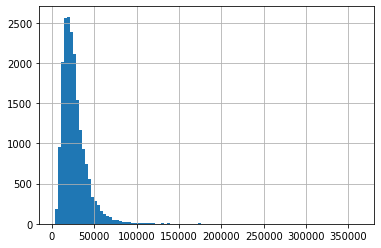

In [2]:
print(credit_score['total_income'].min(),
credit_score['total_income'].max(),
credit_score['total_income'].mean(),
credit_score['total_income'].median())
credit_score['total_income'].hist(bins=100)
credit_score['total_income'] = credit_score['total_income'].fillna(0)

#credit_score['days_employed'] = 
#Because there are a few outliers, it would be more reasonable to use median instead of mean to fill the missing values in total_income column.

In [3]:
credit_score.loc[(credit_score['income_type'] == 'retiree') & (credit_score['total_income'] == 0 ), 'total_income'] = credit_score[credit_score['income_type'] == 'retiree']['total_income'].median()
credit_score.loc[(credit_score['income_type'] == 'employee') & (credit_score['total_income'] == 0), 'total_income'] = credit_score[credit_score['income_type'] == 'employee']['total_income'].median()
credit_score.loc[(credit_score['income_type'] == 'business') & (credit_score['total_income'] == 0), 'total_income'] = credit_score[credit_score['income_type'] == 'business']['total_income'].median()
credit_score.loc[(credit_score['income_type'] == 'civil servant') & (credit_score['total_income'] == 0), 'total_income'] = credit_score[credit_score['income_type'] == 'civil servant']['total_income'].median()
credit_score.loc[(credit_score['income_type'] == 'unemployed') & (credit_score['total_income'] == 0), 'total_income'] = credit_score[credit_score['income_type'] == 'unemployed']['total_income'].median()
credit_score.loc[(credit_score['income_type'] == 'entrepreneur') & (credit_score['total_income'] == 0), 'total_income'] = credit_score[credit_score['income_type'] == 'entrepreneur']['total_income'].median()

In [4]:
#I filled the misssing values in the total_income column with the median total_income of each category of income_type.
#E.g. All missing values of retirees in the total_income column are filled with the median values of retiree category

<div class="alert alert-success">

### Comment 2

Perfect
</div>

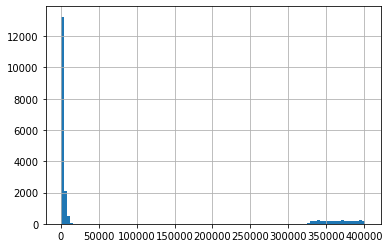

In [5]:
#print(credit_score['days_employed'].min())    # time cannot be negative
credit_score['days_employed'] = credit_score['days_employed'].abs()  # converted to positive
credit_score['days_employed'] = credit_score['days_employed'].astype('float32')
credit_score['days_employed'].hist(bins=100)

In [6]:
#credit_score[credit_score['days_employed']>= 320000]['days_employed']

print(credit_score[credit_score['days_employed'] >=300000]['income_type'].unique())

#only retirees and unemployed have abnormally high days_employed.

['retiree' 'unemployed']


In [7]:
#credit_score[(credit_score['income_type'] =='retiree') & (credit_score['days_employed'] >=300000)]['days_employed']
credit_score[(credit_score['days_employed'] <=300000)]['days_employed'].max()/365

#Without the outliers which are 'retiree' and 'unemployed', the maximum employment days/365 is 50. 
#This seems reasonable.
#I would replace the abnormally high days_employed with the maximum value

50.38068279109589

In [8]:
#print(credit_score['days_employed'].min())    # time cannot be negative
credit_score['days_employed'] = credit_score['days_employed'].abs()  # converted to positive
#credit_score['days_employed'] = credit_score['days_employed'].astype('int')

credit_score.loc[(credit_score['days_employed'] >=300000), 'days_employed']= credit_score[(credit_score['days_employed'] <=300000)]['days_employed'].max()

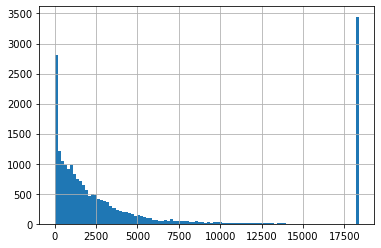

In [9]:
credit_score['days_employed'] = credit_score['days_employed'].fillna(0)

credit_score['days_employed'].hist(bins=100)

### Conclusion

In [10]:
credit_score.loc[(credit_score['income_type'] == 'retiree') & (credit_score['days_employed'] == 0 ), 'days_employed'] = credit_score[credit_score['income_type'] == 'retiree']['days_employed'].median()
credit_score.loc[(credit_score['income_type'] == 'employee') & (credit_score['days_employed'] == 0), 'days_employed'] = credit_score[credit_score['income_type'] == 'employee']['days_employed'].median()
credit_score.loc[(credit_score['income_type'] == 'business') & (credit_score['days_employed'] == 0), 'days_employed'] = credit_score[credit_score['income_type'] == 'business']['days_employed'].median()
credit_score.loc[(credit_score['income_type'] == 'civil servant') & (credit_score['days_employed'] == 0), 'days_employed'] = credit_score[credit_score['income_type'] == 'civil servant']['days_employed'].median()
credit_score.loc[(credit_score['income_type'] == 'unemployed') & (credit_score['days_employed'] == 0), 'days_employed'] = credit_score[credit_score['income_type'] == 'unemployed']['days_employed'].median()
credit_score.loc[(credit_score['income_type'] == 'entrepreneur') & (credit_score['days_employed'] == 0), 'days_employed'] = credit_score[credit_score['income_type'] == 'entrepreneur']['days_employed'].median()

<div class="alert alert-success">

### Comment 2

All done
</div>

In [11]:
credit_score['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

About 10% of the total_income values are missing. Similarly days_emploeyed too. 
There are 2174 values missing in 'total_income' and 'days_employed' columns. 
Both of the columns are quantitative variables
One of the two columns seems to be a MNAR values.( Missing Not At Random)

Also, there were few outliers in total_income column,
Because there are a few outliers, it would be more reasonable to use median instead of mean to fill the missing values in total_income column.
I filled the misssing values in the total_income column with the median total_income of each category of income_type.
E.g. All missing values of retirees in the total_income column are filled with the median values of retiree category

There were an ample fraction of outliers in days_employed.
Without the outliers which are 'retiree' and 'unemployed', the maximum employment days/365 is 50. 
This seems reasonable.
I replaced the abnormally high days_employed with the maximum value.


<div class="alert alert-danger">

### Comment

So, no worries. There are some issues:
- gaps in days_employed: It would be better to fill in the gaps. Gaps for example can be filled with one median / mean or zero, or for educational purposes it would be better to handle more carefully. Moreover, there is nothing terrible there. First Check negative values and correct them. Then you should pay attention to too large values (in a large number of rows) - when recalculated for years, they give 800-1100 years of experience (simply dividing by 365!), Which is unacceptable. Then maybe these are not days at all (not all rows, but only these "giants") ?! Perhaps it is enough to simply divide large values (by 24) and that's it, the data (available) will be ready (processed). And about filling in the gaps: ONLY now, when all the available values are correct, it will be possible to think about how to fill in the gaps ... here you can customize the filling of the gaps, for example, by the type of employment. Look... if you fill in the gaps with one common median (average), then there will be borrowers who have age more experience. 
    
- gaps in income: It would be better to fill in too. it would be acceptable to fill in one common average / median or zero if the data did not contain any other fields by which borrowers can be divided. Do you think entrepreneurs and students will have the same average / median income? ;)
- there can exist not only Nan/Null-gaps. 0-values are also gaps. Please find them and decide what to do. It doesnt mean that you should transform them, but its very importand to find out them.
- conclusion: please, summarize all actions in part, what did you do, and what the sence of it?
</div>

<div class="alert alert-danger">

### Comment 2

Ok, nice try. But your dataset lost 10% data. it means that something went wrong. I gave you the good plan to filling the gaps in red comment above. why don't you use it?
- correct negative values in days_empoyed;
- fix big values here (deviding them (not all) by 24);
- filling gaps here by one or several values;
- filling gaps in total_income by SEVERAL values, calculated by another field, income_type for example. (few medians). Its important. We cant use only one value for filling all gaps in total_income!
- finding 0s. find? ok. yeah, it can be dropped, but dob_years do not effect to main ansvers, so we can leave them without changing at all.

</div>

<div class="alert alert-success">

### Comment 2

Well done
</div>

### Data type replacement

In [12]:
credit_score['days_employed'] = credit_score['days_employed'].astype('int')
credit_score['total_income'] = credit_score['total_income'].astype('int')
credit_score['education'] = credit_score['education'].str.lower()
#too many duplicates written in different cases in the education column
credit_score['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

### Conclusion

I aslo eliminated too many duplicates written in different cases in the education column by using lower string

I also converted the total_income and day_employed to int32 becuase these decimals were not needed and they take unneccesary memory


<div class="alert alert-danger">

### Comment

Something went wrong.
- what about total_income and days_employed... Do we need numbers after dot?
    
</div>

<div class="alert alert-success">

### Comment 2

Good!
</div>

### Processing duplicates

In [13]:
credit_score.drop_duplicates(inplace = True)

In [14]:
credit_score.duplicated().sum()

0

### Conclusion

I wrote to drop any existing duplicate but no duplicate was found.
Data contains no duplicates

<div class="alert alert-warning">

### Comment

Yeah, done.  Notice that all steps of project should end by conclusion
    
</div>

### Categorizing Data

              debt
children          
 5        0.000000
-1        0.021277
 0        0.075444
 3        0.081818
 1        0.092346
 2        0.094542
 4        0.097561
 20       0.105263


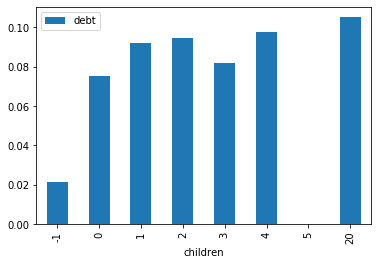

In [15]:
pivot_children = credit_score.pivot_table(index = 'children',values = 'debt')

print(pivot_children.sort_values(by = 'debt'))

pivot_children.plot(kind = 'bar')

                       debt
family_status              
widow / widower    0.065693
divorced           0.071130
married            0.075452
civil partnership  0.093494
unmarried          0.097509


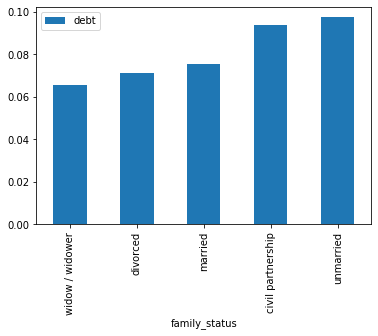

In [16]:
pivot_family_status = credit_score.pivot_table(index = 'family_status',values = 'debt')
pivot_family_status.sort_values(by = 'debt', inplace= True)
print(pivot_family_status)

pivot_family_status.plot(kind = 'bar')

### Conclusion

#Asides those with 3 and 5 children, there's a cummulative increase in debt with the amount of children.
#There are negative values for children which I assume the children died.
#The least debtors are widow / widowers and the civil partnership and unmarried are the most debtors

<div class="alert alert-danger">

### Comment 3 !

This section should have 2 categorizations: income and loan purpose. Unfortunately, there are none. Instead,% of delinquencies in some categories are calculated here, although for these purposes there is the next part of the project. Well ok, this is not critical. But without a clear categorization (income and purpose of the loan), I cannot accept the project. 
- There was already a categorization of income. Why did you delete it? it was technically done correctly, it was only necessary to change the boundaries of division into categories.
- There are also should be creating few categories of 'purpose' in this step
    
</div>

<div class="alert alert-danger">

### Comment

- Sorry, the categorisation of income are not correct. Why 1026/3995 and 12375? What this numbers are? try to study more closely the distribution of values in the income column and create the new borders after it. This trick might help you: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html
- we dont need to split all children-categories to 2 cat. They are already good. 1-2-3-...
- There are also should be creating few categories of 'purpose' in this step
    
</div>

<div class="alert alert-danger">

### Comment 2

There are no changes. Look:
- why it so important good categories? Because it helps to get more correct ansver further. There are 3 cat. in your "level_of_income", and one of them have mostly count of all and another one have only 8. It doesnt help to get good ansver because its too little group. I proposed create another groups - link in comment above, or choose your new borders.
- we allready have good categories in "children" (1,2,3,4,5,20). Moreover, please pay attention to negative values there.
- There are also should be creating few categories of 'purpose' in this step
</div>

<div class="alert alert-danger">

### Comment 4
There are still no any categorization!
    
</div>

### Step 3. Answer these questions

- Is there a relation between having kids and repaying a loan on time?

In [17]:
print(credit_score['children'].value_counts().count())

8


          debt
children      
-1           1
 0        1063
 1         444
 2         194
 3          27
 4           4
 5           0
 20          8
           debt
children       
-1           47
 0        14090
 1         4808
 2         2052
 3          330
 4           41
 5            9
 20          76

children
 5     0.000000
-1     0.021277
 0     0.075444
 3     0.081818
 1     0.092346
 2     0.094542
 4     0.097561
 20    0.105263
Name: debt, dtype: float64


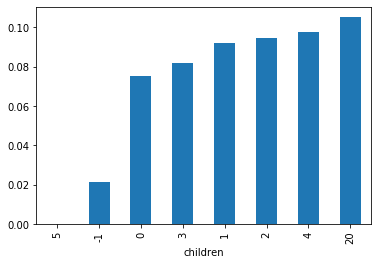

In [18]:
pivot_children_sum = credit_score.pivot_table(index = 'children',values = 'debt', aggfunc = 'sum')
pivot_children_sum.sort_values(by = 'children', inplace= True)
print(pivot_children_sum)

pivot_children_count = credit_score.pivot_table(index = 'children',values = 'debt', aggfunc = 'count')
pivot_children_count.sort_values(by = 'children', inplace= True)
print(pivot_children_count)
print()
ratio_debtors_to_children = (credit_score.groupby('children')['debt'].sum()/credit_score.groupby('children')['debt'].count()).sort_values()
print(ratio_debtors_to_children)
ratio_debtors_to_children.plot(kind = 'bar')

### Conclusion

There are 8 unique categories of children owners in the column.
Asides those with 3 and 5 children, there's a cummulative increase in debt with the amount of children.
people with 20 children owe the most. 10.5% of the entire 76 of them owe debt followed by people with 4 children which 4 out of the 41 of them owe debts(9.7%).

5 is the magic number. '5ers' are debt free. :)

<div class="alert alert-warning">

### Comment 3 !

transfer here the code that resulted in you getting this answer. try to describe the categories in more detail. not only the worst / best but all.
    
</div>

<div class="alert alert-danger">

### Comment 2

- So, we dont need to split all children-categories to 3 cat. They are already good. 1-2-3-... 
- We need to know a share of delays for each catecory we use. Let s have a look to "0"-category. There are 14090 borrowers and only 1058 have debt. What does it mean? It means that only 7.54%(1058/14090*100) of its group are "bad-debtors"... And we need to do this calculations for all categories by using code :). And then match them results in conclusion. In conclusion we should to describe all categories you researched, not only write "yes, it is/no it isnt" or "yes, people with children are more debtors".... aaaaallll categories....
</div>

<div class="alert alert-success">

### Comment 4

Yeah, done.
    
</div>

- Is there a relation between marital status and repaying a loan on time?

In [19]:
print(credit_score['family_status'].value_counts())
#credit_score.info()

married              12339
civil partnership     4150
unmarried             2810
divorced              1195
widow / widower        959
Name: family_status, dtype: int64


                   debt
family_status          
civil partnership   388
divorced             85
married             931
unmarried           274
widow / widower      63
                    debt
family_status           
civil partnership   4150
divorced            1195
married            12339
unmarried           2810
widow / widower      959

family_status
widow / widower      0.065693
divorced             0.071130
married              0.075452
civil partnership    0.093494
unmarried            0.097509
Name: debt, dtype: float64


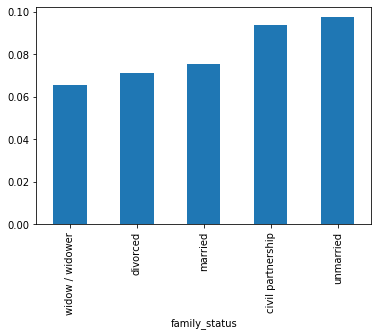

In [20]:
pivot_family_status_sum = credit_score.pivot_table(index = 'family_status',values = 'debt', aggfunc = 'sum')
pivot_family_status_sum.sort_values(by = 'family_status', inplace= True)
print(pivot_family_status_sum)

pivot_family_status_count = credit_score.pivot_table(index = 'family_status',values = 'debt', aggfunc = 'count')
pivot_family_status_count.sort_values(by = 'family_status', inplace= True)
print(pivot_family_status_count)
print()
ratio_debtors_to_family_status = (credit_score.groupby('family_status')['debt'].sum()/credit_score.groupby('family_status')['debt'].count()).sort_values()
print(ratio_debtors_to_family_status)
ratio_debtors_to_family_status.plot(kind = 'bar')

### Conclusion

The least debtors are widow / widowers and the civil partnership and unmarried are the most debtors.
of all the 959 widow/widowers owing, on 63 were still oweing which is 6.5%.

Divorced 85 out of 1195 - 7.1%

married - 931 out of 12339 - 7.5%

civil patnership - 388 out of 4151 - 9.3%

unmarried - 274 out of 2810 - 9.7%

It seems unmarried people have a lot of unshared financial burdens. Hence the high percentage of debtors. :)


<div class="alert alert-warning">

### Comment 3 !

transfer here the code that resulted in you getting this answer. try to describe the categories in more detail. not only the worst / best but all.
    
</div>

<div class="alert alert-danger">

### Comment

The same issue.
- and please try to be more detailed. Describe all categories you explored and differences between them. Add some your own thoughts. What do you think about result? (this applying for all 4 answers)
</div>

<div class="alert alert-danger">

### Comment 2

There are no changes.
-what are the percentages of the studied categories?
- what are the differences?
- by what percentage?
- Why do you think such a result?
    
</div>

<div class="alert alert-success">

### Comment 4

done.
    
</div>

- Is there a relation between income level and repaying a loan on time?

17219.0 31331.0
                 debt
income_category      
high_income       383
low_income        427
middle_income     931
                  debt
income_category       
high_income       5365
low_income        5364
middle_income    10724

income_category
high_income      0.071389
low_income       0.079605
middle_income    0.086815
Name: debt, dtype: float64


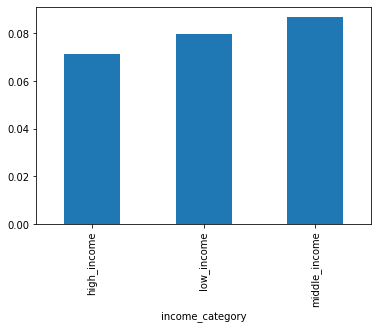

In [21]:
credit_score['total_income'].quantile(0.75)

low_income_limit = credit_score['total_income'].quantile(0.25)
high_income_limit = credit_score['total_income'].quantile(0.75)
print(low_income_limit,high_income_limit)

def income_category(income):
    if income <= low_income_limit:
        return 'low_income'
    elif income >= high_income_limit:
        return 'high_income'
    else:
        return 'middle_income'
    
credit_score['income_category'] = credit_score['total_income'].apply(income_category)


pivot_income_category_sum = credit_score.pivot_table(index = 'income_category',values = 'debt', aggfunc = 'sum')
pivot_income_category_sum.sort_values(by = 'income_category', inplace= True)
print(pivot_income_category_sum)

pivot_income_category_count = credit_score.pivot_table(index = 'income_category',values = 'debt', aggfunc = 'count')
pivot_income_category_count.sort_values(by = 'income_category', inplace= True)
print(pivot_income_category_count)
print()
ratio_debtors_to_income_category = (credit_score.groupby('income_category')['debt'].sum()/credit_score.groupby('income_category')['debt'].count()).sort_values()
print(ratio_debtors_to_income_category)
ratio_debtors_to_income_category.plot(kind = 'bar')


### Conclusion

After categorisizing into three income groups based on the 25% and 75% quantiles namely 
lower (earners below 17219.5), middle (earners high than 17219.5 but less than 31331.0) and high income (earners higher than 31331.0) groups, i noticed the following:

middle_income earners have the highest share of debtors among all income_categories. 931 out of 1725 are owing. 8.6%
high_income earners have the least share of debtors because only 383 people are still owing out of 5365. 7.1%


High income earners pay up than others. :)

<div class="alert alert-warning">

### Comment 3 !

...because there are no categorization. 
    
</div>

<div class="alert alert-success">

### Comment 4

Oh, categorization is appearing). Good!
    
</div>

<div class="alert alert-danger">

### Comment

The same issue.
</div>

<div class="alert alert-danger">

### Comment 2

There are no changes.
-what are the percentages of the studied categories?
- what are the differences?
- by what percentage?
- Why do you think such a result?
    
</div>

- How do different loan purposes affect on-time repayment of the loan?

In [22]:
print(credit_score['purpose'].value_counts().count())

38


                        debt
purpose_category            
car                      403
education                370
housing_or_real_estate   782
wedding                  186
                         debt
purpose_category             
car                      4306
education                4013
housing_or_real_estate  10811
wedding                  2323

purpose_category
housing_or_real_estate    0.072334
wedding                   0.080069
education                 0.092200
car                       0.093590
Name: debt, dtype: float64


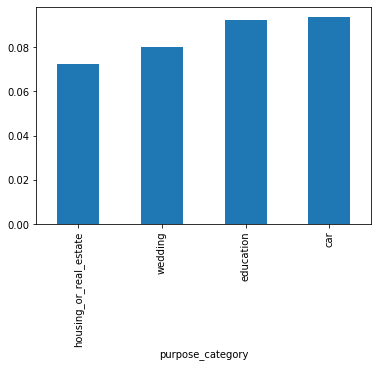

In [23]:
#there are 38 items listed under purpose. whereas, all these purposes fall under 4 main categories: 
#education, housing_or_real_estate,car,wedding

def purpose_category(purpose):
    if 'educat' in purpose or 'university' in purpose:
        return 'education'
    elif 'hous' in purpose or  'build' in purpose or 'property' in purpose or  "estate" in purpose:
        return 'housing_or_real_estate'
    elif  'car' in purpose:
        return 'car'
    elif 'wedding' in purpose:
        return 'wedding'
    else:
        return purpose
    
credit_score['purpose_category'] = credit_score['purpose'].apply(purpose_category)

pivot_purpose_sum = credit_score.pivot_table(index = 'purpose_category',values = 'debt', aggfunc = 'sum')
pivot_purpose_sum.sort_values(by = 'purpose_category', inplace= True)
print(pivot_purpose_sum)

pivot_purpose_count = credit_score.pivot_table(index = 'purpose_category',values = 'debt', aggfunc = 'count')
pivot_purpose_count.sort_values(by = 'purpose_category', inplace= True)
print(pivot_purpose_count)
print()
#grouped = credit_score['purpose_category'].value_counts()
ratio_debtors_to_purpose = (credit_score.groupby('purpose_category')['debt'].sum()/credit_score.groupby('purpose_category')['debt'].count()).sort_values()
print(ratio_debtors_to_purpose)
ratio_debtors_to_purpose.plot(kind = 'bar')

Conclusion

there are 38 unique items listed under purpose. whereas, all these purposes fall under 4 main categories: 
education, housing_or_real_estate,car,wedding.


when comparing categories, with '1' as debt still being owed and '0' as debt paid, car owners appear to be the highest debtors because 9.35% of them still owe debt(403 out of 4036), followed by loan takers for education and loan takers for wedding.
house_or_real_estate have the lowest amount of debts among the category of debtors: 7.32%.


It seems a car is a liabilty while real_estate is an asset. :)

<div class="alert alert-warning">

### Comment 3 !

please, first - add categorization and then calculate % of debtors in each categorie
    
</div>

<div class="alert alert-success">

### Comment 4

Yeeeeeeaahh! Well done!
    
</div>

<div class="alert alert-danger">

### Comment

try to follow the plan:
- creating categories
- calculating shares of bad-debtors...
- conclusion
</div>

<div class="alert alert-danger">

### Comment 2

There are no changes.
    
</div>

### Step 4. General conclusion

The data is very quite messy, especially the days_employed column. But the descripancies have been resolved.

In cases were applicable, missing values were filled witht he median of respective category.


The highest categories of defaulters are people with 20 children. 10.5% of them are still owing followed by unmarried people who have 9.7% share of debtors.

If i would recommend potential borrowers that will pay back, the following groups would be favorably considered:
1. Borrowers for housing or real estate. Only 7.2% of them are owing and that is the lowest with respect to borrowers' purpose. It seems hosuing is the best asset sompared to other purposes.
2.  High_income earners (earners with total_income above 30331) too have a good reputation of paying back. Only 7.1% which is also the lowest in the category of income earners 
3. Widow/widowers have the best record in respect of marital status. only 63 out of 959 have not paid. 6.5%
4. People with 5 children have no single debtor.


Conclusively, my ideal candidate for the best borrower would be a high_income earning widow/widower that earns above 30331 with five children thatwants to borrow for housing purpose.  

<div class="alert alert-danger">

### Comment
    
The final conclusion, unfortunately, escaped ). Customers (and they only read the output, they don't need the code) would be happy to see something more detailed and voluminous that they can read. Now for filling:

- what was our goal?
- what data did we have in our hands?
- how we processed / modified / worked with gaps and duplicates + reasoning on the appearance of duplicates / zeros / gaps / artifacts.
- general figures for the entire table. Average percentage of delinquency, which groups are more (for example, pensioners)
- answers to questions - in as much detail as possible for all groups with numbers and reasoning.
- and at the very end "what was the goal and how the answers to the questions will help to achieve this goal"
    
This is an approximate plan of the final output for any analytical project. I propose to add your own according to it and everything will be fine!
</div>

<div class="alert alert-danger">

### Comment 2

There are no changes. Its very important. It means that for the analyst, the ability to write large, detailed conclusions is as important as the ability to write code. when HR hiring appreciate first of all this skill and not the possession of python.
    
</div>

### Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

I used the worldbank income index to categorise total_income level

<div class="alert alert-danger">

### Comment 2

There are no info about currency or country in our project, so we need to use only statistic methods.
</div>

<div class="alert alert-danger">

### Comment 3 !

we don't need a description of the ideal client for the bank. we need a detailed description of the entire project and detailed figures for each category of persons. You already have a plan
</div>

<div class="alert alert-success">

### Comment 4

Well done!
    
</div>